In [2]:
import basis
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
color_list = ['#3b6291', '#943c39', '#779043', '#624c7c', '#388498', '#bf7334', '#3f6899', '#9c403d', '#7d9847', '#675083', '#3b8ba1', '#c97937']

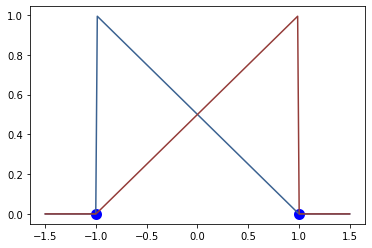

In [11]:
## linear basis functions
x = np.linspace(-1.5, 1.5, 200)
phi1 = np.zeros(x.shape[0])
phi2 = np.zeros(x.shape[0])
node = np.zeros(2)
phi = np.zeros(2)
for i in range(x.shape[0]):
    basis.shape1d_node2(idx=0, x=x[i], node=node, phi=phi)
    phi1[i] = phi[0]
    phi2[i] = phi[1]
fig1 = plt.figure(num=1)
ax1 = fig1.add_subplot(111)
ax1.plot(x, phi1, c=color_list[0])
ax1.plot(x, phi2, c=color_list[1])
ax1.scatter(node, np.zeros(node.shape[0]), c='b', lw=5)

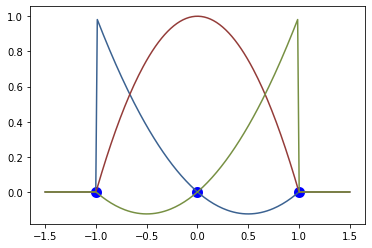

In [10]:
## quadratic basis functions
x = np.linspace(-1.5, 1.5, 200)
phi1 = np.zeros(x.shape[0])
phi2 = np.zeros(x.shape[0])
phi3 = np.zeros(x.shape[0])
node = np.zeros(3)
phi = np.zeros(3)
for i in range(x.shape[0]):
    basis.shape1d_node3(idx=0, x=x[i], node=node, phi=phi)
    phi1[i] = phi[0]
    phi2[i] = phi[1]
    phi3[i] = phi[2]
fig2 = plt.figure(num=2)
ax2 = fig2.add_subplot(111)
ax2.plot(x, phi1, c=color_list[0])
ax2.plot(x, phi2, c=color_list[1])
ax2.plot(x, phi3, c=color_list[2])
ax2.scatter(node, np.zeros(node.shape[0]), c='b', lw=5)

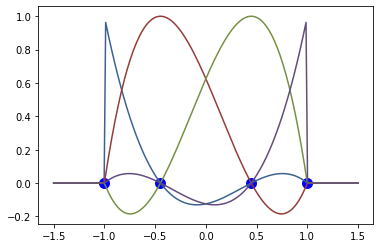

In [13]:
## cubic basis functions
x = np.linspace(-1.5, 1.5, 200)
phi1 = np.zeros(x.shape[0])
phi2 = np.zeros(x.shape[0])
phi3 = np.zeros(x.shape[0])
phi4 = np.zeros(x.shape[0])
node = np.zeros(4)
phi = np.zeros(4)
for i in range(x.shape[0]):
    basis.shape1d_node4(idx=0, x=x[i], node=node, phi=phi)
    phi1[i] = phi[0]
    phi2[i] = phi[1]
    phi3[i] = phi[2]
    phi4[i] = phi[3]
    
fig3 = plt.figure(num=3)
ax3 = fig3.add_subplot(111)
ax3.plot(x, phi1, c=color_list[0])
ax3.plot(x, phi2, c=color_list[1])
ax3.plot(x, phi3, c=color_list[2])
ax3.plot(x, phi4, c=color_list[3])
ax3.scatter(node, np.zeros(node.shape[0]), c='b', lw=5)

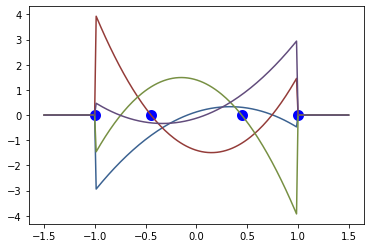

In [17]:
## 1 order derivative of cubic basis functions
x = np.linspace(-1.5, 1.5, 200)
phi1 = np.zeros(x.shape[0])
phi2 = np.zeros(x.shape[0])
phi3 = np.zeros(x.shape[0])
phi4 = np.zeros(x.shape[0])
node = np.zeros(4)
phi = np.zeros(4)
for i in range(x.shape[0]):
    basis.shape1d_node4(idx=1, x=x[i], node=node, phi=phi)
    phi1[i] = phi[0]
    phi2[i] = phi[1]
    phi3[i] = phi[2]
    phi4[i] = phi[3]
    
fig3 = plt.figure(num=3)
ax3 = fig3.add_subplot(111)
ax3.plot(x, phi1, c=color_list[0])
ax3.plot(x, phi2, c=color_list[1])
ax3.plot(x, phi3, c=color_list[2])
ax3.plot(x, phi4, c=color_list[3])
ax3.scatter(node, np.zeros(node.shape[0]), c='b', lw=5)

In [4]:
## test 1D gaussian quadrature
gauss_num = 4
gauss_x = np.zeros(gauss_num); gauss_w = np.zeros(gauss_num)
basis.gauss_legendre_quadrature_set1d(4, gauss_x, gauss_w)
x = np.linspace(-1., 1., 100)
def fsin(x):
    return np.sin(x)
def fcos(x):
    return np.cos(x)
def fpoly(x):
    return x**6. + x**4. + x**2.
# sin
res = 0.
for i in range(gauss_x.shape[0]):
    res += fsin(gauss_x[i]) * gauss_w[i]
print(res)
# cos
res = 0.
for i in range(gauss_x.shape[0]):
    res += fcos(gauss_x[i]) * gauss_w[i]
print(res)
# poly
res = 0.
for i in range(gauss_x.shape[0]):
    res += fpoly(gauss_x[i]) * gauss_w[i]
print(res)

0.0
1.6829416886959734
1.3523809523809522


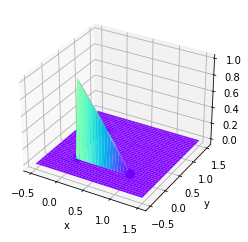

In [5]:
## test 2d basis functions
idx = 0
idy = 0
x2d, y2d = np.meshgrid(np.linspace(-0.5,1.5,40), np.linspace(-0.5,1.5,40),indexing='ij')
phi2d_01 = np.zeros(x2d.shape)
phi2d_02 = np.zeros(x2d.shape)
phi2d_03 = np.zeros(x2d.shape)

for i in range(x2d.shape[0]):
    for j in range(x2d.shape[1]):
        node_x = np.zeros(3)
        node_y = np.zeros(3)
        phi = np.zeros(3)
        basis.shape2d_t3(idx, idy, x2d[i,j], y2d[i,j], node_x, node_y, phi)
        phi2d_01[i,j] = phi[0]
        phi2d_02[i,j] = phi[0]
        phi2d_03[i,j] = phi[0]
        
fig4 = plt.figure(num=4)
ax4 = fig4.add_subplot(111, projection='3d')
ax4.plot_surface(x2d, y2d, phi2d_02, cmap='rainbow')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('z')
ax4.scatter(node_x, node_y, np.zeros(node_x.shape[0]), c='b', lw=5)

In [8]:
## test 1d Gaussian quadrature on any given interval
gauss_num = 4
gauss_x = np.zeros(gauss_num); gauss_w = np.zeros(gauss_num)
basis.gauss_legendre_quadrature_set1d(4, gauss_x, gauss_w)
x1 = -2; x2 = 3.; JacobianFactor = (x2 - x1) / 2.

def fpoly(x):
    return x**6. + x**4. + x**2.
def affine_map(x1, x2, hat_x):
    res = (x2 - x1) / 2. * hat_x + (x2 + x1) / 2.
    return res

# poly
res = 0.
for i in range(gauss_x.shape[0]):
    gauss_x_after_map = affine_map(x1, x2, gauss_x)
    res += fpoly(gauss_x_after_map[i]) * gauss_w[i]
res *= JacobianFactor
print(res)

397.38095238095235


In [9]:
## test 2d Gaussian quadrature on reference triangle
def test_tri_integrand(x,y):
    return x**5. + 3. * y**3.
n = 9
x_quad = np.zeros(n)
y_quad = np.zeros(n)
w_quad = np.zeros(n)
basis.gauss_quadrature_triangle(n=n, x=x_quad, y=y_quad, w=w_quad)
res = 0.
for i in range(x_quad.shape[0]):
    res += test_tri_integrand(x_quad[i], y_quad[i]) * w_quad[i]
res *= 0.5
print(res)
# the result has been benchmarked with Mathematica

0.1738095238095234


In [13]:
## test 2d Gaussian quadrature on any triangle
def test_tri_integrand(x,y):
    return x**5. + 3. * y**3.
tri_x = np.array([0, 10., 0.])
tri_y = np.array([0, 0, 40.])
n = 9
x_quad = np.zeros(n)
y_quad = np.zeros(n)
w_quad = np.zeros(n)
basis.gauss_quadrature_triangle(n=n, x=x_quad, y=y_quad, w=w_quad)
Jacobian_factor = (tri_x[1]-tri_y[0]) * (tri_y[2]-tri_y[0]) - (tri_x[2] - tri_x[0]) * (tri_y[1] - tri_y[0])
def affine_map(tri_x, tri_y, hat_x, hat_y):
    res = np.zeros(2)
    res[0] = (tri_x[1] - tri_x[0]) * hat_x + (tri_x[2] - tri_x[0]) * hat_y + tri_x[0]
    res[1] = (tri_y[1] - tri_y[0]) * hat_x + (tri_y[2] - tri_y[0]) * hat_y + tri_y[0]
    return res
res = 0.
for i in range(x_quad.shape[0]):
    temp_xy = affine_map(tri_x, tri_y ,x_quad[i], y_quad[i])
    res += test_tri_integrand(temp_xy[0], temp_xy[1]) * w_quad[i]
res *= 0.5 * Jacobian_factor
print(res)

4792380.952380941
